In [36]:
import matplotlib.pyplot as plt
import numpy as np
execfile('/home/xiaodongli/software/pythonlib/stdA.py')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/share/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product', 'copy', 'random', 'transpose']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

def plot_difference(X1,X2,Z1,Z2):
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111)
    Xs, rats= [], []
    for row in range(len(X1)):
        if Z1[row]>0 and Z2[row]>0:
            rat = Z2[row] / Z1[row]
            #print X1[row], rat
            Xs.append(X1[row]); rats.append(rat)
    ax.plot(Xs, rats)
    ax.grid()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #ax.set_xlabel('', fontsize=18); ax.set_ylabel('Ratio', fontsize=18)
    ## 美化一下。。。
    # plt.savefig(r'2pcf difference.pdf', format='pdf')
    plt.show()
    # plt.savefig(r'2pcf difference'.pdf, format='pdf')

Populating the interactive namespace from numpy and matplotlib


### COLA particle?

### COLA FOF halo, BigMD Rockstar halo

In [3]:
!ls -alh /home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf

-rw-r--r-- 1 xiaodongli xiaodongli 1.6M 3月  11 12:06 /home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf


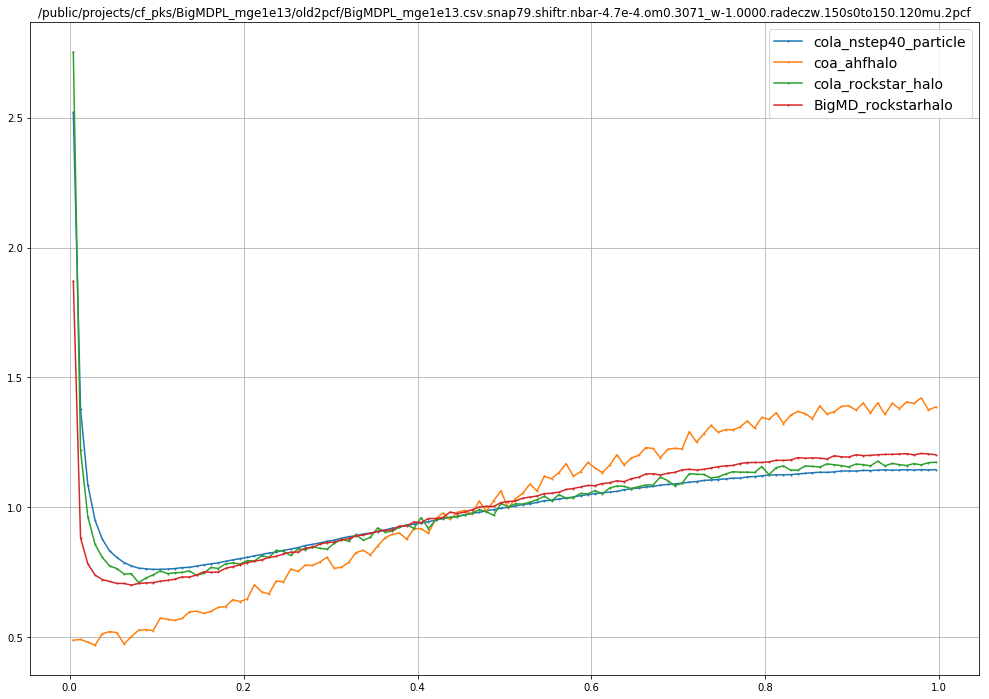

In [17]:
fig = plt.figure(figsize=(17, 12))
ax = fig.add_subplot(111)
for filename_label in [
    #['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_nstep80_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep80/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'cola_nstep80_particle'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep40/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_nstep40_particle'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep20/sub00001c.txt.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_nstep20_particle'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep20/ahfcola_halos.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'coa_ahfhalo'],
    ['/home/xiaodongli/projects/simulation/cola_output_nstep20/cola_rockstar_halos.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_rockstar_halo'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_nstep80_noshift'],
    #['/home/xiaodongli/projects/simulation/cola_output_128box_800c/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_output_128box_800c_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output_nstep40/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',
    # 'cola_nstep40_fofhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output/fof00001c.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_nstep10_fofhalo'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_016.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'CITA_particle'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.halos.nbar-4.7e-4.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf',
     #'CITA_ahfhalo'],
    ['/public/projects/cf_pks/BigMDPL_mge1e13/old2pcf/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'BigMD_rockstarhalo'],
    #['/home/xiaodongli/projects/simulation/cola_output/matchfof.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',
     #'cola_another_fof']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    Y = intximu/int_intximu_to_mu
    #Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)

### BigMD Rockstar halo

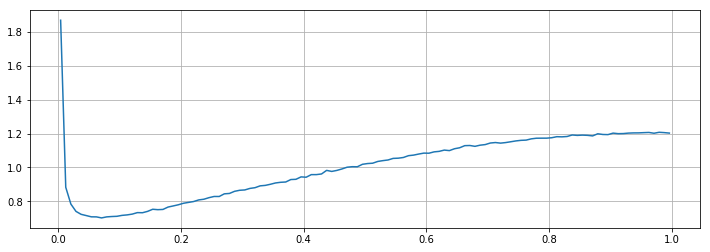

In [6]:
filename = '/home/xiaodongli/projects/cf_pks/BigMDPL_mge1e13/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
data = np.loadtxt(filename)
numsbin=150; nummubin=120;
s_min=6; s_max = 40;

xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
for rows in range(numsbin):
    for rowmu in range(nummubin):
        irow = rows*nummubin+rowmu
        DD = data[irow][3]/norms[0]
        DR = data[irow][4]/norms[1]
        RR = data[irow][6]/norms[2]
        xi[rows][rowmu] = (DD - 2*DR + RR)/RR
intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
mu = [data[row][0] for row in range(120)]
mu_1 = [1-data[row][0] for row in range(120)]
dmu = [mu[i+1]-mu[i] for i in range(119)]

int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
xidelsmu = intximu/int_intximu_to_mu

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.plot(mu_1,xidelsmu)
ax.grid()

### CITA N-body, particle

Text(0,0.5,'$\\hat \\xi_{\\Delta s}(\\mu)$')

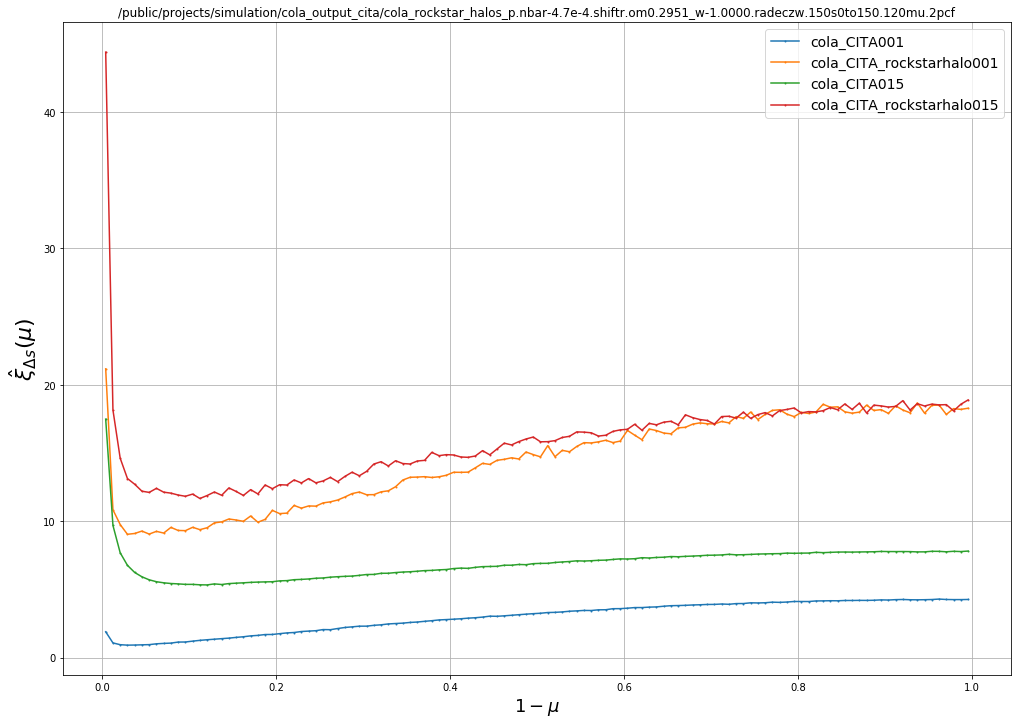

In [10]:
fig = plt.figure(figsize=(17, 12))
ax = fig.add_subplot(111)
for filename_label in [
    ['/public/projects/simulation/cola_output_cita/cola_cita_01.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_CITA001'],
    ['/public/projects/simulation/cola_output_cita/cola_rockstar_halos_b.nbar-4.7e-4.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_CITA_rockstarhalo001'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_001.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     #'CITA_particle001'],
    #['/public/projects/simulation/cola_output_cita/cola_cita_09.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_CITA008'],
    #['/public/projects/simulation/cola_output_cita/cola_rockstar_halos_i.nbar-4.7e-4.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'cola_CITA_rockstarhalo008'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_008.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'CITA_particle008'],
    ['/public/projects/simulation/cola_output_cita/cola_cita_015.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_CITA015'],
    ['/public/projects/simulation/cola_output_cita/cola_rockstar_halos_p.nbar-4.7e-4.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'cola_CITA_rockstarhalo015'],
    #['/public/projects/cf_pks/BigMDPL_mge1e13/old2pcf/BigMDPL_mge1e13.csv.snap79.shiftr.nbar-4.7e-4.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'BigMD_z0_rockstarhalo'],
    #['/home/xiaodongli/projects/mhyl_2pcf/CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
    # 'CITA_particle015']
    ]:
    filename, label = filename_label
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]

    int_intximu_to_mu = sum([intximu[row]*1.0/120 for row in range(120)])
    #Y = intximu/int_intximu_to_mu
    Y = intximu

    ax.plot(X, Y, marker='o', markersize=1, label=label )
    ax.set_title(filename)
ax.grid()
ax.legend(fontsize=14)
ax.set_xlabel('$1-\mu$', fontsize=18)
ax.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)

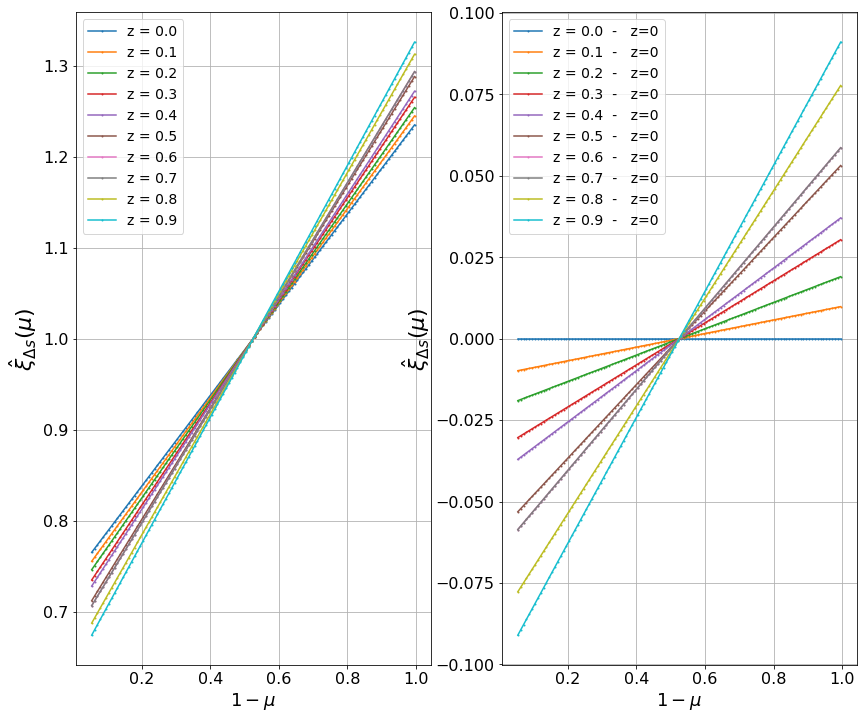

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(14,12), )
#ax1, ax2 = axs
chars = 'abcdefghijklmnopq'
imumin = int(120*0.05)
for snpid in range(15,5,-1):
    filename = '/public/projects/simulation/cola_output_cita/cola_rockstar_halos_'+chars[snpid]+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    label = 'z = '+str(1.5-snpid*0.1)
    
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)][:-imumin]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]
    intximu = intximu[:-imumin]
    Y = intximu/np.mean(intximu)
    #Y = intximu;
    if snpid == 15: Y0 = np.copy(Y)

    ax1.plot(X, polyfitY(X,Y,1), marker='o', markersize=1, label=label )
    ax2.plot(X, polyfitY(X,Y-Y0,1), marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax1.plot(X, Y, marker='o', markersize=1, label=label )
    #ax2.plot(X, Y-Y0, marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax.set_title(filename)
for ax in ax1, ax2:
    ax.grid()
    ax.legend(fontsize=14)
    ax.set_xlabel('$1-\mu$', fontsize=18)
    ax.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)

IOError: [Errno 2] No such file or directory: '/public/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_gadget_p.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'

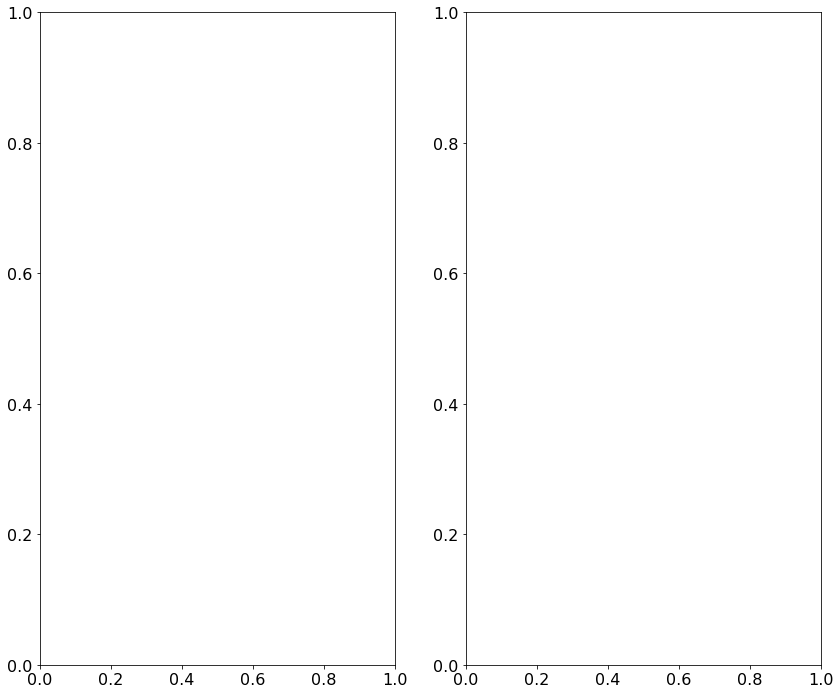

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(14,12), )
#ax1, ax2 = axs
#chars = 'abcdefghijklmnopq'
imumin = int(120*0.05)
for snpid in range(15,5,-1):
    filename = '/public/projects/cf_pks/CITAData/rockstar_halos/rockstar_halos_gadget_'+chars[snpid]+'.nbar-1e-3.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    label = 'z = '+str(1.5-snpid*0.1)
    
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)][:-imumin]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]
    intximu = intximu[:-imumin]
    Y = intximu/np.mean(intximu)
    #Y = intximu;
    if snpid == 15: Y0 = np.copy(Y)

    ax1.plot(X, polyfitY(X,Y,1), marker='o', markersize=1, label=label )
    ax2.plot(X, polyfitY(X,Y-Y0,1), marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax1.plot(X, Y, marker='o', markersize=1, label=label )
    #ax2.plot(X, Y-Y0, marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax.set_title(filename)
for ax in ax1, ax2:
    ax.grid()
    ax.legend(fontsize=14)
    ax.set_xlabel('$1-\mu$', fontsize=18)
    ax.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)

### cola rockstar halos 2pcf: see redshfit dependence

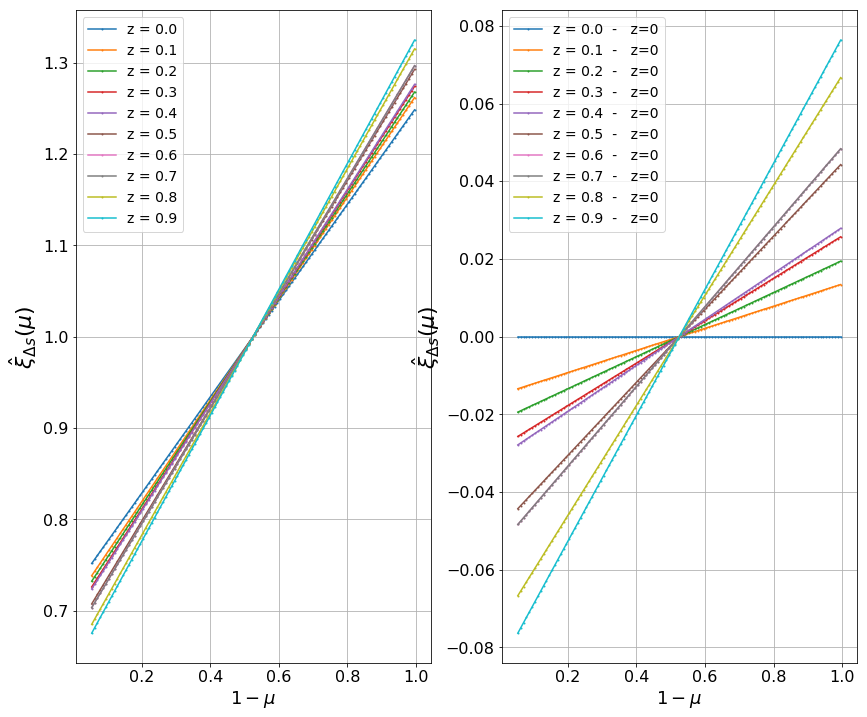

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(14,12), )
#ax1, ax2 = axs
chars = 'abcdefghijklmnopq'
imumin = int(120*0.05)
for snpid in range(15,5,-1):
    filename = '/public/projects/simulation/cola_output_cita/cola_rockstar_halos_'+chars[snpid]+'.nbar-4.7e-4.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    label = 'z = '+str(1.5-snpid*0.1)
    
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)][:-imumin]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]
    intximu = intximu[:-imumin]
    Y = intximu/np.mean(intximu)
    #Y = intximu;
    if snpid == 15: Y0 = np.copy(Y)

    ax1.plot(X, polyfitY(X,Y,1), marker='o', markersize=1, label=label )
    ax2.plot(X, polyfitY(X,Y-Y0,1), marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax1.plot(X, Y, marker='o', markersize=1, label=label )
    #ax2.plot(X, Y-Y0, marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax.set_title(filename)
for ax in ax1, ax2:
    ax.grid()
    ax.legend(fontsize=14)
    ax.set_xlabel('$1-\mu$', fontsize=18)
    ax.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)

### BigMD 2pcfs -- very close to COLA result!

In [38]:
bigmd_redata = np.loadtxt('/home/xiaodongli/data/BigMDPL/Redshifts.csv', delimiter=',')
bigmd_reds = {}
for row in range(len(bigmd_redata)):
    bigmd_reds[int(bigmd_redata[row,0])] = (bigmd_redata[row,3])

In [50]:
bigmd_reds

{1: 8.8039,
 2: 7.6957,
 3: 6.4074,
 4: 5.4103,
 5: 4.102,
 6: 3.4053,
 7: 2.8911,
 8: 2.4843,
 9: 2.1447,
 10: 1.445,
 11: 1.0,
 12: 0.8868,
 13: 0.8369,
 14: 0.8169,
 15: 0.7976,
 16: 0.7784,
 17: 0.7593,
 18: 0.7413,
 19: 0.7232,
 20: 0.7053,
 21: 0.688,
 22: 0.6714,
 23: 0.6548,
 24: 0.6383,
 25: 0.6226,
 26: 0.6069,
 27: 0.5913,
 28: 0.5763,
 29: 0.5618,
 30: 0.547,
 31: 0.5328,
 32: 0.5191,
 33: 0.5053,
 34: 0.4916,
 35: 0.4786,
 36: 0.4656,
 37: 0.4526,
 38: 0.4401,
 39: 0.428,
 40: 0.4156,
 41: 0.4037,
 42: 0.3922,
 43: 0.3806,
 44: 0.3581,
 45: 0.3472,
 46: 0.3256,
 47: 0.3153,
 48: 0.2947,
 49: 0.2849,
 50: 0.2702,
 51: 0.2652,
 52: 0.2464,
 53: 0.237,
 54: 0.2279,
 55: 0.2235,
 56: 0.2145,
 57: 0.2102,
 58: 0.2013,
 59: 0.1972,
 60: 0.1885,
 61: 0.1844,
 62: 0.1759,
 63: 0.1719,
 64: 0.1636,
 65: 0.1597,
 66: 0.1515,
 67: 0.1477,
 68: 0.1399,
 69: 0.136,
 70: 0.1283,
 71: 0.1245,
 72: 0.1169,
 73: 0.1131,
 74: 0.1058,
 75: 0.102,
 76: 0.0809,
 77: 0.046,
 78: 0.0302,
 79: 0.

/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/79_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/75_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/58_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/48_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/41_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/33_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/26_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/15_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf
/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/12_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120

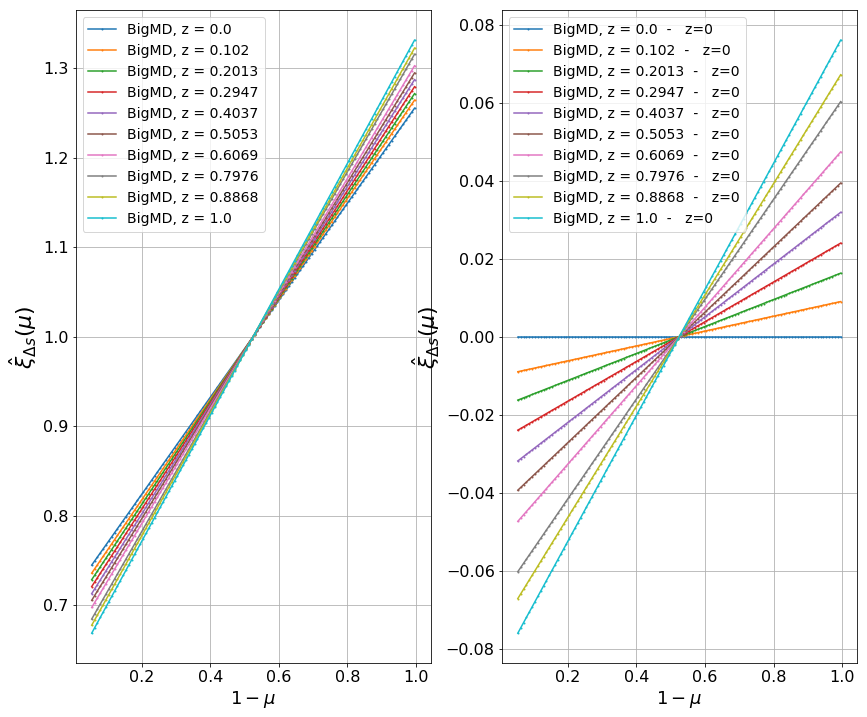

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(14,12), )
#ax1, ax2 = axs
imumin = int(120*0.05)
nowstr = ''
cita_to_bigmd_snapid = {15:79, 14: 75, 13:58, 12:48, 11:41,10:33, 9:26, 8:20, 8:15, 7:12, 6:11, 0:10}
for snpid in range(15,5,-1):
#for snpid in range(6,15):
    filename = '/home/xiaodongli/data/BigMDPL/snaps/nbar1e-3/'+str(cita_to_bigmd_snapid[snpid])+'_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    label = 'BigMD, z = '+str(bigmd_reds[cita_to_bigmd_snapid[snpid]])
    #nowstr += (str(bigmd_reds[cita_to_bigmd_snapid[snpid]])+', '); continue
    print filename
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=150; nummubin=120;
    s_min=5; s_max = 40;
    #s_min=120; s_max = 149;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)][:-imumin]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]
    intximu = intximu[:-imumin]
    Y = intximu/np.mean(intximu)
    #Y = intximu;
    if snpid == 15: Y0 = np.copy(Y)

    ax1.plot(X, polyfitY(X,Y,1), marker='o', markersize=1, label=label )
    ax2.plot(X, polyfitY(X,Y-Y0,1), marker='o', markersize=1, label=label+ '  -   z=0' )
    #ax.set_title(filename)
for ax in ax1, ax2:
    ax.grid()
    ax.legend(fontsize=14)
    ax.set_xlabel('$1-\mu$', fontsize=18)
    ax.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)

### BigMD, different mass bin

In [57]:
filenames = commands.getoutput("ls ../BigMD_2pcfs/m*shiftr*.2pcf").split()

In [65]:
filenames[0]

'../BigMD_2pcfs/m1.0e13to2.0e13.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf'

../BigMD_2pcfs/m1.0e13to2.0e13.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf
../BigMD_2pcfs/m2.0e12to4.0e12.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf
../BigMD_2pcfs/m2.0e13to5.0e13.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf
../BigMD_2pcfs/m4.0e12to6.0e12.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf
../BigMD_2pcfs/m5.0e13to1.0e14.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf
../BigMD_2pcfs/m6.0e12to8.0e12.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf
../BigMD_2pcfs/m8.0e12to1.0e13.shiftr.om0.3071_w-1.0000.100r0to100.120mu.xplus0.smu.2pcf


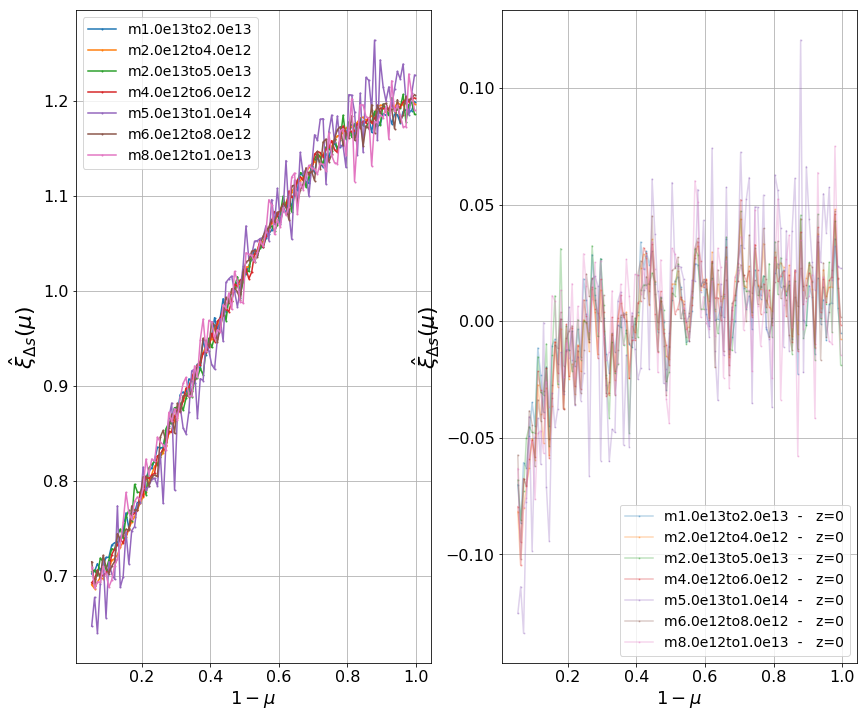

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(14,12), )
#ax1, ax2 = axs
imumin = int(120*0.05)
nowstr = ''
for filename in filenames:
    label = filename[15:30]
    #nowstr += (str(bigmd_reds[cita_to_bigmd_snapid[snpid]])+', '); continue
    print filename
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    data = np.loadtxt(filename)
    numsbin=100; nummubin=120;
    s_min=6; s_max = 40;
    
    xi = [[0 for rowmu in range(nummubin)] for rows in range(numsbin)];
    
    for rows in range(numsbin):
        for rowmu in range(nummubin):
            irow = rows*nummubin+rowmu
            DD = data[irow][3]/norms[0]
            DR = data[irow][4]/norms[1]
            RR = data[irow][6]/norms[2]
            xi[rows][rowmu] = (DD - 2*DR + RR)/RR
    intximu = [ sum([xi[rows][rowmu] for rows in range(s_min,s_max+1)]) for rowmu in range(nummubin)]
    mu = [data[row][0] for row in range(120)]
    X = [1-data[row][0] for row in range(120)][:-imumin]
    #dmu = [mu[i+1]-mu[i] for i in range(119)]
    intximu = intximu[:-imumin]
    Y = intximu/np.mean(intximu)
    #Y = intximu;
    if snpid == 15: Y0 = np.copy(Y)

    ax1.plot(X, Y, marker='o', markersize=1, label=label )
    ax2.plot(X, Y-Y0, marker='o', markersize=1, label=label+ '  -   z=0', alpha=0.3 )
    #ax.set_title(filename)
for ax in ax1, ax2:
    ax.grid()
    ax.legend(fontsize=14)
    ax.set_xlabel('$1-\mu$', fontsize=18)
    ax.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)

### CITA N-body, FOF halo?

In [ ]:
['/home/xiaodongli/projects/simulation/cola_output_nstep20/ahfcola_halos.nbar-4.7e-4.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf', 
     'coa_ahfhalo'],